[View in Colaboratory](https://colab.research.google.com/github/rvoak/skill2vec/blob/master/Gensim.ipynb)

In [3]:
!pip install gensim 

    100% |████████████████████████████████| 23.6MB 1.4MB/s 
    100% |████████████████████████████████| 1.4MB 14.2MB/s 
    100% |████████████████████████████████| 133kB 27.6MB/s 
    100% |████████████████████████████████| 4.7MB 4.9MB/s 
    100% |████████████████████████████████| 61kB 20.0MB/s 
    100% |████████████████████████████████| 552kB 11.1MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [1]:
import pandas as pd
import numpy as np
import io
import requests

url = "http://users.wpi.edu/~yutaowang/data/skill_builder_data.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('ISO-8859-1')))


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df2=df[['user_id','first_action','skill_id','ms_first_response','skill_name']]
df3=df2.sort_values(['user_id','ms_first_response'])
#df3=df2.sort_values(['ms_first_response'])


df3=df3.dropna()
ulist=df3['user_id'].unique()
df4=df3.set_index(['user_id'])
df4=df4.fillna(0)
#df4['skill_2']=int(df4['skill_id'])
vecs=[]


 
    
for i in ulist:
 
  x=df4.loc[i]
  a=x['skill_id']
  #print(a.values)
  
  #vecs.append((np.asarray(a)).tolist())
  #print((np.asarray(a)).tolist())
  
  #WORKS
  #vecs.append(np.asarray(str(x['skill_name'])).tolist())
  
  subvecs=[]
  df5=df4[df['user_id']==i]
  p=df5['skill_id'].values
  
  key=''
  for w in p:
    subvecs.append(str(w))
  
  #vecs.append(np.asarray(str((x['skill_id']).tolist())))
  #print (len(np.asarray(x['skill_id']).tolist()))
  vecs.append(subvecs)
 
#print(type(vecs))
#print (list(vecs))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [0]:
vecs

In [5]:
import gensim
model = gensim.models.Word2Vec(vecs, size=10, window=10, min_count=2, workers=10)
model.train(vecs,total_examples=len(vecs),epochs=10)

(1509342, 4468440)

In [20]:
import csv
g=df.groupby(['skill_id','skill_name']).count()
g=g.reset_index()
g.columns
g2=g[['skill_id','skill_name']]
g2.set_index('skill_id')
print(g2.columns)
skillist={}

for k in model.wv.vocab:
  x=float(k)
  g3=g2[g2['skill_id']==x]
  t=g3['skill_name'].values[0]
  skillist[x]=t

with open('dict.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in skillist.items():
       writer.writerow([key, value])
  
skillist

Index(['skill_id', 'skill_name'], dtype='object')


{1.0: 'Box and Whisker',
 2.0: 'Circle Graph',
 4.0: 'Histogram as Table or Graph',
 5.0: 'Number Line',
 8.0: 'Scatter Plot',
 9.0: 'Stem and Leaf Plot',
 10.0: 'Table',
 11.0: 'Venn Diagram',
 12.0: 'Mean',
 13.0: 'Median',
 14.0: 'Mode',
 15.0: 'Range',
 16.0: 'Counting Methods',
 17.0: 'Probability of Two Distinct Events',
 18.0: 'Probability of a Single Event',
 21.0: 'Interior Angles Figures with More than 3 Sides',
 22.0: 'Interior Angles Triangle',
 24.0: 'Congruence',
 25.0: 'Complementary and Supplementary Angles',
 26.0: 'Angles on Parallel Lines Cut by a Transversal',
 27.0: 'Pythagorean Theorem',
 32.0: 'Nets of 3D Figures',
 34.0: 'Unit Conversion Within a System',
 35.0: 'Effect of Changing Dimensions of a Shape Prportionally',
 39.0: 'Area Circle',
 40.0: 'Circumference ',
 42.0: 'Perimeter of a Polygon',
 43.0: 'Reading a Ruler or Scale',
 46.0: 'Calculations with Similar Figures',
 47.0: 'Conversion of Fraction Decimals Percents',
 48.0: 'Equivalent Fractions',
 49.0:

In [0]:
from google.colab import files
files.download('dict.csv')

In [0]:
for k in model.wv.vocab:
  t=float(k)
  print(skillist[t])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


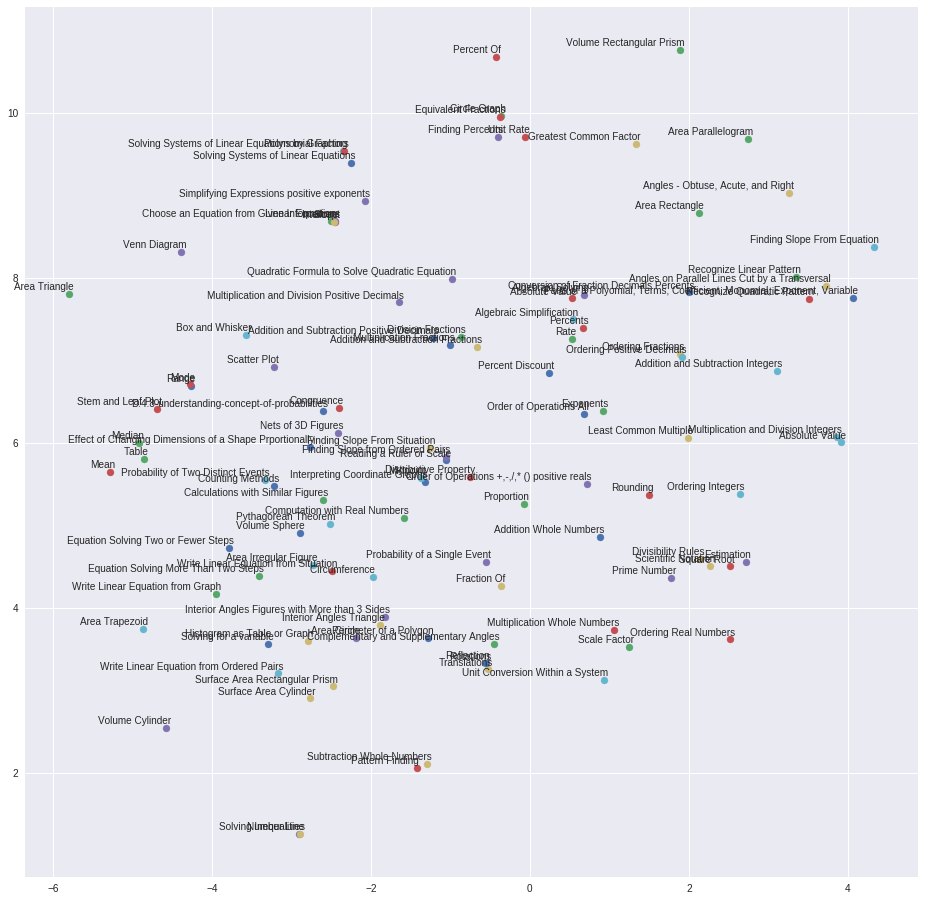

In [155]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(skillist[float(word)])
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)